In [94]:
import cv2
import numpy as np
import os
import zipfile 
import tensorflow as tf 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [95]:
tf.__version__
width,height = 128,128

In [96]:
images = []
classes = []

Extracting pixels from images

In [97]:
zip_obj = zipfile.ZipFile(file='zip files\homer_bart_1.zip',mode='r')
zip_obj.extractall('./')
zip_obj.close()

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Boss Baby\AppData\Local\Temp\ipykernel_34452\3447901703.py:1: SyntaxWarning: invalid escape sequence '\h'
  zip_obj = zipfile.ZipFile(file='zip files\homer_bart_1.zip',mode='r')


In [98]:
directory = 'homer_bart_1'
files = [os.path.join(directory,f) for f in sorted(os.listdir(directory))]
print(files)

['homer_bart_1\\.DS_Store', 'homer_bart_1\\bart1.bmp', 'homer_bart_1\\bart10.bmp', 'homer_bart_1\\bart100.bmp', 'homer_bart_1\\bart101.bmp', 'homer_bart_1\\bart102.bmp', 'homer_bart_1\\bart103.bmp', 'homer_bart_1\\bart104.bmp', 'homer_bart_1\\bart105.bmp', 'homer_bart_1\\bart106.bmp', 'homer_bart_1\\bart108.bmp', 'homer_bart_1\\bart109.bmp', 'homer_bart_1\\bart11.bmp', 'homer_bart_1\\bart110.bmp', 'homer_bart_1\\bart111.bmp', 'homer_bart_1\\bart112.bmp', 'homer_bart_1\\bart113.bmp', 'homer_bart_1\\bart114.bmp', 'homer_bart_1\\bart115.bmp', 'homer_bart_1\\bart116.bmp', 'homer_bart_1\\bart117.bmp', 'homer_bart_1\\bart118.bmp', 'homer_bart_1\\bart119.bmp', 'homer_bart_1\\bart12.bmp', 'homer_bart_1\\bart120.bmp', 'homer_bart_1\\bart121.bmp', 'homer_bart_1\\bart122.bmp', 'homer_bart_1\\bart123.bmp', 'homer_bart_1\\bart124.bmp', 'homer_bart_1\\bart125.bmp', 'homer_bart_1\\bart126.bmp', 'homer_bart_1\\bart127.bmp', 'homer_bart_1\\bart128.bmp', 'homer_bart_1\\bart13.bmp', 'homer_bart_1\\bart13

In [99]:
for f in files:
    try:
        image = cv2.imread(f)
        (H, W) = image.shape[:2]
    except:
        continue
    image = cv2.resize(image,(width,height))
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image = image.ravel() ##image to vector
    images.append(image)
    image_name = os.path.basename(os.path.normpath(f))
    if image_name.startswith('b'):
        class_name =0
    else:
        class_name =1

    classes.append(class_name)


In [100]:


print(images)

[array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([254, 254, 254, ..., 254, 254, 254], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 128, 123, 124], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([254, 254, 254, ..., 254, 254, 254], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255

In [101]:
type(images), type(classes)

(list, list)

In [102]:
X= np.asarray(images)
y = np.asarray(classes)


In [103]:
X.shape,y.shape ##128*128

((269, 16384), (269,))

In [104]:
print(y) ##0 means bart, 1 means homer

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]


In [105]:
print(X[0])

[255 255 255 ... 255 255 255]


In [106]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [107]:
X[0].reshape(width,height).shape

(128, 128)

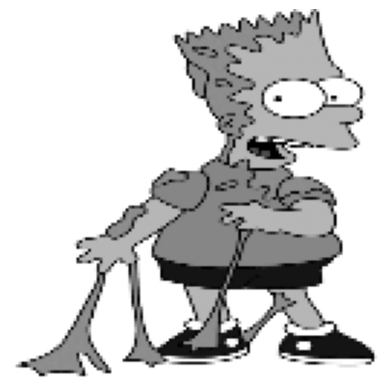

In [108]:
plt.imshow(X[0].reshape(width,height),cmap='gray')
plt.axis('off')
plt.show()

In [109]:
np.unique(y,return_counts=True)

(array([0, 1]), array([160, 109], dtype=int64))

Train Test Split

In [110]:
X[0].max(),X[0].min()

(255, 0)

In [111]:
X[0].max(), X[0].min()

(255, 0)

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=1)


Normalizing the data

In [113]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)

In [114]:
X_test_norm = scaler.transform(X_test)

In [115]:
X_train_norm.shape

(215, 16384)

In [116]:
X_test_norm.shape

(54, 16384)

Building and training the neural network

In [117]:
units = (16384+2)/2 ##number of classes(Output) =2, number of inputs 16384, 2 is num used in denominator

In [118]:
##16384 -> 
network1 = tf.keras.models.Sequential()
network1.add(tf.keras.layers.Dense(input_shape=(16384,), units=8193, activation='relu'))
network1.add(tf.keras.layers.Dense(units=8193,activation = 'relu')) ##no need to specify the input_shape in 2nd hidden layer
network1.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))


e:\AI_ML\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [119]:
network1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 8193)           │   134,242,305 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8193)           │    67,133,442 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,383,941 (768.22 MB)

 Trainable params: 201,383,941 (768.22 MB)

 Non-trainable params: 0 (0.00 B)

In [120]:
network1.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = network1.fit(X_train_norm,y_train,epochs=50)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.4724 - loss: 144.2343
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5324 - loss: 8.9429
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4381 - loss: 1.4765
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6165 - loss: 0.7663
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5239 - loss: 0.7132
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5116 - loss: 0.7753
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6644 - loss: 0.6144
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7297 - loss: 0.6544
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6598 - loss: 0.6508
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6647 - loss: 0.6331
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7130 - loss: 0.6013
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6623 - loss: 0.6340
Epoch 13/50
7/7 ━━━━━━

In [122]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

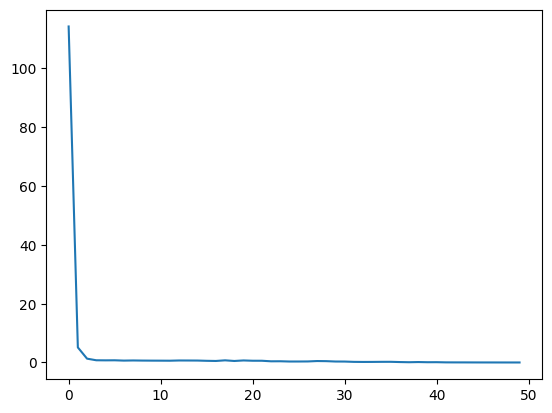

In [123]:
plt.plot(history.history['loss'])
plt.show()

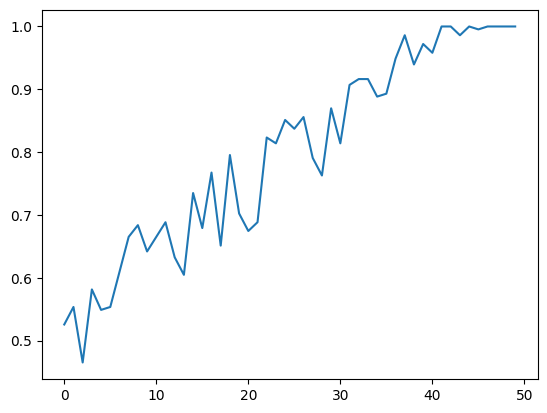

In [124]:
plt.plot(history.history['accuracy'])
plt.show()

In [125]:
X_test_norm.shape

(54, 16384)

In [126]:
predictions = network1.predict(X_test_norm)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [129]:
predictions = (predictions>0.5)
predictions

array([[False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True]])

In [130]:
y_test

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [133]:
from sklearn.metrics import accuracy_score,confusion_matrix 
accuracy_score(y_test,predictions)
cm = confusion_matrix(y_test,predictions)

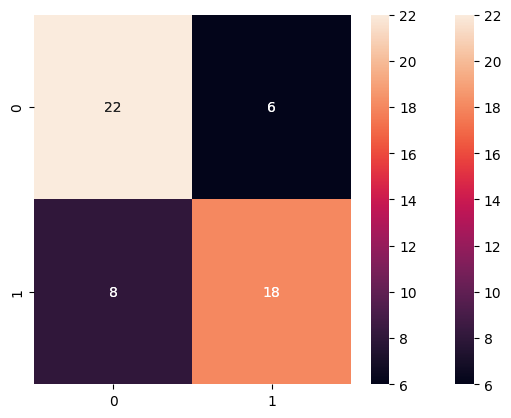

In [135]:
sns.heatmap(cm,annot=True)
plt.show()

In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        28
           1       0.75      0.69      0.72        26

    accuracy                           0.74        54
   macro avg       0.74      0.74      0.74        54
weighted avg       0.74      0.74      0.74        54

